# 2 Investigating the red sources

We will look at three lists of objects

- HELP 500 um flux over 70 mJy
- ESA/IPAC 500 um flux over 70 mJy
- HELP XID+ masterlist 500 um fluxes above 70 mJy

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
#plt.rc('figure', figsize=(10, 6))
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

import pyvo as vo
import time
from pymoc import MOC

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table, inMoc

/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  sel

In [2]:
help_blind = Table.read('./data/dmu22_XID+SPIRE_HELP_BLIND_Matched_MF_500_70mJy.fits')
esa_blind = Table.read('../dmu22_IRSA/data/irsa_catalog_search_results_tbl_500.csv')


In [3]:
esa_blind['ra'].unit = u.deg
esa_blind['dec'].unit = u.deg
for c in esa_blind.colnames:
    esa_blind[c].name = 'esa_' + c

In [4]:
esa_blind[:5]

esa_spscid,esa_det,esa_ra,esa_dec,esa_ra_err,esa_dec_err,esa_pos_flag,esa_astrom_flag,esa_nmap,esa_ndet,esa_dupl_flag,esa_flux,esa_flux_err,esa_fluxtml_err,esa_conf_err,esa_snr,esa_insterr_flag,esa_fluxsus,esa_fluxsus_err,esa_fluxdao,esa_fluxdao_err,esa_fluxtm2,esa_fluxtm2_err,esa_fwhm1,esa_fwhm1_err,esa_fwhm2,esa_fwhm2_err,esa_rot,esa_rot_err,esa_pntsrc_flag,esa_extsrc_flag,esa_lowfwhm_flag,esa_largegal_flag,esa_mapedge_flag,esa_ssocont_flag,esa_q3ctile
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
str25,str3,float64,float64,float64,float64,str1,str1,int64,int64,str1,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,str9,str10,str6,str6,str5,str6,float64,float64,str1,str1,str1,str1,str1,str1,int64
HSPSC500A_J2248.24-4439.6,PLW,342.0601,-44.66,2.1,1.5,F,F,1,1,F,23.0,5.7,1.8,5.6,4.0,F,19.8,2.5,35.9,14.4,22.7,4.1,40.6,4.2,31.1,3.5,44.2,16.4,T,F,F,F,F,F,6610338672980000767
HSPSC500A_J2248.24-3504.0,PLW,342.0608,-35.0678,3.2,2.5,F,F,2,1,F,47.2,14.9,6.3,14.0,3.2,F,31.0,9.1,33.7,14.0,79.2,25.4,68.3,15.9,33.9,5.5,49.9,9.5,F,T,F,F,F,F,1265902921430597631
HSPSC500A_J2248.24-2919.6,PLW,342.0612,-29.3283,2.9,2.5,F,F,1,1,F,45.6,11.9,6.2,10.8,3.8,F,36.4,8.5,62.9,21.1,82.4,25.3,54.2,10.3,52.0,9.5,57.5,167.5,F,T,F,F,F,F,1275437886266671103
HSPSC500A_J2248.24-3046.4,PLW,342.0613,-30.7742,3.7,3.1,F,F,1,1,F,38.3,11.8,6.5,10.8,3.2,F,39.4,9.4,14.7,5.9,32.9,13.1,31.9,7.4,31.4,7.4,115.3,180.0,T,F,F,F,F,F,1268858408686059519
HSPSC500A_J2248.26-3450.3,PLW,342.0659,-34.8386,3.5,0.5,F,F,2,2,F,63.7,13.9,5.1,13.4,4.6,F,66.9,7.9,36.2,4.9,58.4,10.6,35.7,3.8,30.9,3.4,27.9,25.6,T,F,F,F,F,F,1266008474546864127


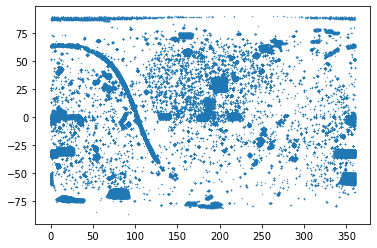

In [5]:
plt.scatter(esa_blind['esa_ra'],esa_blind['esa_dec'], s=0.1)

In [6]:
for c in help_blind.colnames:
    help_blind[c].name = 'blind_' + c

In [7]:
print(len(esa_blind), np.sum(esa_blind['esa_flux']>70), np.sum(esa_blind['esa_fluxsus']>70))


218296 42567 19220


In [33]:
np.sum(esa_blind['esa_fluxsus']/esa_blind['esa_fluxsus_err']>5)

4260

In [8]:
help_moc = MOC(filename ='../../dmu2/help_coverage_MOC.fits')
in_help = inMoc(esa_blind['esa_ra'],esa_blind['esa_dec'],help_moc)

print(np.sum(in_help))

101352


In [9]:
print(len(esa_blind), np.sum(esa_blind['esa_flux']>70), np.sum(esa_blind['esa_fluxsus']>70))

218296 42567 19220


In [10]:
esa_blind = esa_blind[(esa_blind['esa_flux']>70) & in_help]

In [31]:
len(esa_blind)

5000

In [11]:
help_blind['blind_RA'].name = 'ra'
help_blind['blind_Dec'].name = 'dec'

In [12]:
help_blind[:5]

blind_HELP_ID,ra,dec,blind_F_SPIRE_250,blind_FErr_SPIRE_250_u,blind_FErr_SPIRE_250_l,blind_F_SPIRE_350,blind_FErr_SPIRE_350_u,blind_FErr_SPIRE_350_l,blind_F_SPIRE_500,blind_FErr_SPIRE_500_u,blind_FErr_SPIRE_500_l,blind_Bkg_SPIRE_250,blind_Bkg_SPIRE_350,blind_Bkg_SPIRE_500,blind_Sig_conf_SPIRE_250,blind_Sig_conf_SPIRE_350,blind_Sig_conf_SPIRE_500,blind_Rhat_SPIRE_250,blind_Rhat_SPIRE_350,blind_Rhat_SPIRE_500,blind_n_eff_SPIRE_250,blind_n_eff_SPIRE_500,blind_n_eff_SPIRE_350,blind_Pval_res_250,blind_Pval_res_350,blind_Pval_res_500,blind_flag_spire_250,blind_flag_spire_350,blind_flag_spire_500,blind_F_BLIND_MF_SPIRE_250,blind_FErr_BLIND_MF_SPIRE_250,blind_F_BLIND_MF_SPIRE_350,blind_FErr_BLIND_MF_SPIRE_350,blind_F_BLIND_MF_SPIRE_500,blind_FErr_BLIND_MF_SPIRE_500,blind_r,blind_P,blind_RA_pix,blind_Dec_pix,blind_F_BLIND_pix_SPIRE,blind_FErr_BLIND_pix_SPIRE,blind_flag,blind_field
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,,,deg,deg,mJy,mJy,,
bytes33,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes13
HELP_BLIND_J132035.199+340823.944,200.14666093222147,34.139984460626756,5585.709,5585.7417,5585.6445,2149.6992,2149.81,2149.446,659.279,659.7341,658.2682,-1.460162,-2.159969,-3.4670208,7.2524767,4.448374,3.1155865,nan,nan,0.9995246,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,6390.488777765193,6.475020475713654,2371.1640106039195,6.544042884037684,735.0517441505609,6.452658666321968,0.7965170388143706,1.0,200.1476401466958,34.139150647568016,5808.073027312961,6.622847430622127,0.0,HATLAS-NGP
HELP_BLIND_J131503.697+243709.274,198.76540292122607,24.619242858594557,3730.1772,3730.2734,3729.9421,1502.2577,1506.5585,1497.7003,516.32574,518.7789,512.27045,-1.2838266,-2.7109509,-4.1480207,5.668097,4.231518,3.2830224,nan,1.0000073,0.9995233,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,3994.117869072061,6.324876530541631,1567.0040038706527,5.598440312095881,536.9172365043631,6.311143787466074,0.7807693245774889,1.0,198.76448128689057,24.618414825611595,3833.333240383705,6.203769866835555,0.0,HATLAS-NGP
HELP_BLIND_J125440.864+285621.115,193.6702686733103,28.939198567126557,3371.739,3371.7888,3371.6328,1765.58,1765.6238,1765.4854,860.104,860.21045,859.85803,-0.5651935,-1.9437292,-3.5710735,25.787022,13.055087,6.358543,nan,nan,nan,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,4336.075321306187,5.561965754359003,2297.586230671728,5.613884128048924,1073.6664924712218,5.879615410558071,0.7623766258950777,1.0,193.66935390611053,28.93833936573529,3333.2032635538617,5.457766939853846,0.0,HATLAS-NGP
HELP_BLIND_J133955.603+282402.670,204.9816801055134,28.400741740256905,2135.466,2135.4993,2135.387,1049.1398,1049.2178,1048.9945,472.19516,472.7262,471.0313,-0.8959201,-1.7262993,-2.8792737,8.486645,4.9961395,4.03243,nan,nan,0.9992486,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,2504.0886134660827,5.852280827955278,1168.3056811014544,5.838565811620903,527.4015769955221,6.492418954889658,0.8113158679247728,1.0,204.98138554544394,28.401032976576335,2152.6956528993496,5.738864517699985,0.0,HATLAS-NGP
HELP_BLIND_J130125.252+291849.285,195.35521522575544,29.313690334163766,1762.0795,1762.3076,1761.5529,661.7097,662.2488,660.5981,217.47719,219.12042,214.50778,-1.4513615,-2.020604,-3.6917322,4.4567766,4.031373,3.614342,nan,1.000221,0.99962765,2000.0,2000.0,2000.0,1.0,1.0,0.0,True,True,False,1851.6291091763517,6.026787479063286,696.6617160954174,5.580877219928563,236.4402131547448,5.930806503390525,0.7922672534032332,1.0,195.3548913282094,29.31396069609381,1846.0224374904212,5.906271642088381,0.0,HATLAS-NGP


In [13]:
print(len(help_blind))

2117


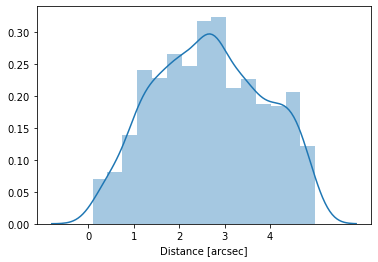

In [14]:

nb_merge_dist_plot(
    SkyCoord(help_blind['ra'], help_blind['dec']),
    SkyCoord(esa_blind['esa_ra'], esa_blind['esa_dec'])
)

In [15]:
match_dist=20.*u.arcsec

In [16]:

# Given the graph above, we use 0.8 arc-second radius
master_catalogue = merge_catalogues(help_blind, esa_blind, "esa_ra", "esa_dec", radius=match_dist)
master_catalogue = clean_table(master_catalogue)

/Users/rs548/GitHub/herschelhelp_internal/herschelhelp_internal/masterlist.py:392: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  merged_catalogue[colname][merged_catalogue[colname].mask] = False
/Users/rs548/GitHub/herschelhelp_internal/herschelhelp_internal/masterlist.py:392: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  merged_catalogue[colname][merged_catalogue[colname].mask] = False
/Users/rs548/GitHub/herschelhelp_internal/herschelhelp_internal/masterlist.py:392: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  merged_catalogue[colname][merged_catalogue[colname].mask] = False
/Users/rs548/GitHub/herschelhelp_internal/herschelhelp_internal/masterlist.py:392: StringTruncateWarning: truncated right side string(s) longer than 1 character(s) during assignment
  merged_catalogue[colname][merged_catalogue[colname].mask] = False


In [17]:
master_catalogue[(master_catalogue['blind_F_SPIRE_500'] > 0) & (master_catalogue['esa_fluxsus'] > 0)][:5]

blind_HELP_ID,ra,dec,blind_F_SPIRE_250,blind_FErr_SPIRE_250_u,blind_FErr_SPIRE_250_l,blind_F_SPIRE_350,blind_FErr_SPIRE_350_u,blind_FErr_SPIRE_350_l,blind_F_SPIRE_500,blind_FErr_SPIRE_500_u,blind_FErr_SPIRE_500_l,blind_Bkg_SPIRE_250,blind_Bkg_SPIRE_350,blind_Bkg_SPIRE_500,blind_Sig_conf_SPIRE_250,blind_Sig_conf_SPIRE_350,blind_Sig_conf_SPIRE_500,blind_Rhat_SPIRE_250,blind_Rhat_SPIRE_350,blind_Rhat_SPIRE_500,blind_n_eff_SPIRE_250,blind_n_eff_SPIRE_500,blind_n_eff_SPIRE_350,blind_Pval_res_250,blind_Pval_res_350,blind_Pval_res_500,blind_flag_spire_250,blind_flag_spire_350,blind_flag_spire_500,blind_F_BLIND_MF_SPIRE_250,blind_FErr_BLIND_MF_SPIRE_250,blind_F_BLIND_MF_SPIRE_350,blind_FErr_BLIND_MF_SPIRE_350,blind_F_BLIND_MF_SPIRE_500,blind_FErr_BLIND_MF_SPIRE_500,blind_r,blind_P,blind_RA_pix,blind_Dec_pix,blind_F_BLIND_pix_SPIRE,blind_FErr_BLIND_pix_SPIRE,blind_flag,blind_field,flag_merged,esa_spscid,esa_det,esa_ra_err,esa_dec_err,esa_pos_flag,esa_astrom_flag,esa_nmap,esa_ndet,esa_dupl_flag,esa_flux,esa_flux_err,esa_fluxtml_err,esa_conf_err,esa_snr,esa_insterr_flag,esa_fluxsus,esa_fluxsus_err,esa_fluxdao,esa_fluxdao_err,esa_fluxtm2,esa_fluxtm2_err,esa_fwhm1,esa_fwhm1_err,esa_fwhm2,esa_fwhm2_err,esa_rot,esa_rot_err,esa_pntsrc_flag,esa_extsrc_flag,esa_lowfwhm_flag,esa_largegal_flag,esa_mapedge_flag,esa_ssocont_flag,esa_q3ctile
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,,,deg,deg,mJy,mJy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes33,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes13,bool,str25,str3,float64,float64,str1,str1,int64,int64,str1,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,str9,str10,str6,str6,str5,str6,float64,float64,str1,str1,str1,str1,str1,str1,int64
HELP_BLIND_J005850.021-290120.932,14.708420259504996,-29.022481017107122,98.77845,99.968735,96.31086,124.7146,129.38513,119.92359,88.531494,93.95626,82.83312,-0.54408854,-1.4693842,-1.8779491,6.8054605,6.2304897,5.475402,0.9997964,0.99895924,1.0013632,2000.0,2000.0,2000.0,0.786,0.011,0.001,True,False,False,99.09233133618805,5.862384227497036,118.15742275589417,5.720645273573185,80.3255683900608,5.94356267031562,0.9293925089320924,1.0,14.708420259504994,-29.022481017107122,81.98030787099047,5.744384913631275,0.0,HATLAS-SGP,False,HSPSC500A_J0058.83-2901.3,PLW,0.2,1.9,F,F,2,2,F,93.0,18.5,4.4,18.2,5.0,F,103.1,6.0,62.3,5.1,82.7,9.2,37.6,2.5,28.8,2.0,156.5,7.4,T,F,F,F,F,F,1504927953216077823
HELP_BLIND_J143202.684-005219.298,218.01118256749152,-0.8720270859434005,92.0684,94.78802,88.62687,105.01896,105.90154,103.5048,79.769844,80.46397,78.449684,-0.545455,-1.7080371,-2.6340785,3.8569703,4.1428137,3.7074745,0.9996251,0.9987531,0.99879545,2000.0,2000.0,2000.0,0.108,0.99,0.003,False,True,False,86.55175551801368,4.305081050854975,98.74367129812639,4.141099879684436,89.14762223794504,4.648646893866144,0.9545790985977408,1.0,218.01145900137752,-0.872304291458213,83.30401071244134,4.217607263838142,0.0,GAMA-15,False,HSPSC500A_J1432.04-0052.3,PLW,0.2,1.1,F,F,2,2,F,80.8,12.3,3.7,11.9,6.6,F,70.3,5.4,97.9,11.6,120.1,11.9,52.2,3.2,41.4,2.3,135.1,14.0,F,T,F,F,F,F,4029353874031640575
HELP_BLIND_J234742.246-505502.041,-3.073974462797966,-50.9172335929534,598.07623,598.8127,596.6423,237.13483,238.16872,234.99754,93.14271,96.2304,88.49542,-1.7151464,-1.9628683,-2.3646576,2.80155,2.8657365,0.29085663,0.999973,0.99908364,0.99877393,2000.0,2000.0,2000.0,1.0,0.0,0.0,True,False,False,625.6430004473278,7.564444264029623,255.41551288254598,6.388365107389981,92.76635856307797,6.826082580660209,0.8142882664242782,1.0,-3.0749122273576184,-50.91672077859669,630.6899994670647,7.3969487177920366,0.0,SSDF,False

In [18]:
master_catalogue['ra'].name = 'blind_ra'
master_catalogue['dec'].name = 'blind_dec'

In [19]:
np.sum(np.isnan(master_catalogue['blind_ra']))

0

In [20]:
m = master_catalogue['blind_ra'] < 0 
print(np.sum(m), len(master_catalogue))
master_catalogue['blind_ra'][m] += 360.

266 5438


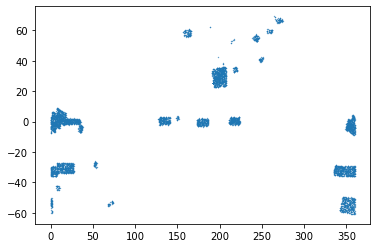

In [21]:
plt.scatter(master_catalogue['blind_ra'],master_catalogue['blind_dec'], s=0.1)

In [26]:
len(master_catalogue)

5438

## XID+ VO objects (after first ingestion missing fields)

In [22]:
cross_query = """
SELECT
    db.help_id,
    db.ra,
    db.dec,
    db.f_spire_250,
    db.ferr_spire_250,
    db.f_spire_350,
    db.ferr_spire_350,
    db.f_spire_500,
    db.ferr_spire_500,
    db.cigale_sfr,
    db.cigale_mstar
FROM herschelhelp.main AS db
WHERE db.f_spire_500 > 70
JOIN TAP_UPLOAD.t1 AS tc
ON 1=CONTAINS(POINT('ICRS', db.ra, db.dec),
CIRCLE('ICRS', tc.blind_ra, tc.blind_dec, 5.0/3600.))
"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [23]:
#help_blind['ra'].name = 'help_ra'
#help_blind['dec'].name = 'help_dec'
help_blind[:5]

blind_HELP_ID,ra,dec,blind_F_SPIRE_250,blind_FErr_SPIRE_250_u,blind_FErr_SPIRE_250_l,blind_F_SPIRE_350,blind_FErr_SPIRE_350_u,blind_FErr_SPIRE_350_l,blind_F_SPIRE_500,blind_FErr_SPIRE_500_u,blind_FErr_SPIRE_500_l,blind_Bkg_SPIRE_250,blind_Bkg_SPIRE_350,blind_Bkg_SPIRE_500,blind_Sig_conf_SPIRE_250,blind_Sig_conf_SPIRE_350,blind_Sig_conf_SPIRE_500,blind_Rhat_SPIRE_250,blind_Rhat_SPIRE_350,blind_Rhat_SPIRE_500,blind_n_eff_SPIRE_250,blind_n_eff_SPIRE_500,blind_n_eff_SPIRE_350,blind_Pval_res_250,blind_Pval_res_350,blind_Pval_res_500,blind_flag_spire_250,blind_flag_spire_350,blind_flag_spire_500,blind_F_BLIND_MF_SPIRE_250,blind_FErr_BLIND_MF_SPIRE_250,blind_F_BLIND_MF_SPIRE_350,blind_FErr_BLIND_MF_SPIRE_350,blind_F_BLIND_MF_SPIRE_500,blind_FErr_BLIND_MF_SPIRE_500,blind_r,blind_P,blind_RA_pix,blind_Dec_pix,blind_F_BLIND_pix_SPIRE,blind_FErr_BLIND_pix_SPIRE,blind_flag,blind_field,flag_merged
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,,,deg,deg,mJy,mJy,,,
bytes33,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes13,bool
HELP_BLIND_J132035.199+340823.944,200.14666093222147,34.139984460626756,5585.709,5585.7417,5585.6445,2149.6992,2149.81,2149.446,659.279,659.7341,658.2682,-1.460162,-2.159969,-3.4670208,7.2524767,4.448374,3.1155865,nan,nan,0.9995246,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,6390.488777765193,6.475020475713654,2371.1640106039195,6.544042884037684,735.0517441505609,6.452658666321968,0.7965170388143706,1.0,200.1476401466958,34.139150647568016,5808.073027312961,6.622847430622127,0.0,HATLAS-NGP,False
HELP_BLIND_J131503.697+243709.274,198.76540292122607,24.619242858594557,3730.1772,3730.2734,3729.9421,1502.2577,1506.5585,1497.7003,516.32574,518.7789,512.27045,-1.2838266,-2.7109509,-4.1480207,5.668097,4.231518,3.2830224,nan,1.0000073,0.9995233,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,3994.117869072061,6.324876530541631,1567.0040038706527,5.598440312095881,536.9172365043631,6.311143787466074,0.7807693245774889,1.0,198.76448128689057,24.618414825611595,3833.333240383705,6.203769866835555,0.0,HATLAS-NGP,False
HELP_BLIND_J125440.864+285621.115,193.6702686733103,28.939198567126557,3371.739,3371.7888,3371.6328,1765.58,1765.6238,1765.4854,860.104,860.21045,859.85803,-0.5651935,-1.9437292,-3.5710735,25.787022,13.055087,6.358543,nan,nan,nan,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,4336.075321306187,5.561965754359003,2297.586230671728,5.613884128048924,1073.6664924712218,5.879615410558071,0.7623766258950777,1.0,193.66935390611053,28.93833936573529,3333.2032635538617,5.457766939853846,0.0,HATLAS-NGP,False
HELP_BLIND_J133955.603+282402.670,204.9816801055134,28.400741740256905,2135.466,2135.4993,2135.387,1049.1398,1049.2178,1048.9945,472.19516,472.7262,471.0313,-0.8959201,-1.7262993,-2.8792737,8.486645,4.9961395,4.03243,nan,nan,0.9992486,2000.0,2000.0,2000.0,1.0,1.0,1.0,True,True,True,2504.0886134660827,5.852280827955278,1168.3056811014544,5.838565811620903,527.4015769955221,6.492418954889658,0.8113158679247728,1.0,204.98138554544394,28.401032976576335,2152.6956528993496,5.738864517699985,0.0,HATLAS-NGP,False
HELP_BLIND_J130125.252+291849.285,195.35521522575544,29.313690334163766,1762.0795,1762.3076,1761.5529,661.7097,662.2488,660.5981,217.47719,219.12042,214.50778,-1.4513615,-2.020604,-3.6917322,4.4567766,4.031373,3.614342,nan,1.000221,0.99962765,2000.0,2000.0,2000.0,1.0,1.0,0.0,True,True,False,1851.6291091763517,6.026787479063286,696.6617160954174,5.580877219928563,236.4402131547448,5.930806503390525,0.7922672534032332,1.0,195.3548913282094,29.31396069609381,1846.0224374904212,5.906271642088381,0.0,HATLAS-NGP,False


In [25]:
job = service.submit_job(cross_query,
                          uploads = {'t1': master_catalogue})
start_time = time.time()
job.run()
job_url = job.url
job.wait(phases='COMPLETED')
print('Job {} running after {} seconds.'.format(job.phase, round(time.time() - start_time)))


KeyboardInterrupt: 

In [ ]:
job.phase

In [ ]:
result = job.fetch_result()
help_cross = clean_table(result.table)

In [ ]:
for c in help_cross.colnames:
    help_cross[c].name = 'help_' + c

In [ ]:
master_catalogue = merge_catalogues(master_catalogue, help_cross, "help_ra", "help_dec", radius=match_dist)
master_catalogue = clean_table(master_catalogue)

## compare sets

In [27]:
both = (master_catalogue['blind_F_SPIRE_500'] > 0) & (master_catalogue['esa_fluxsus'] > 0)

Text(0, 0.5, 'ESA blind 500 [mJy]')

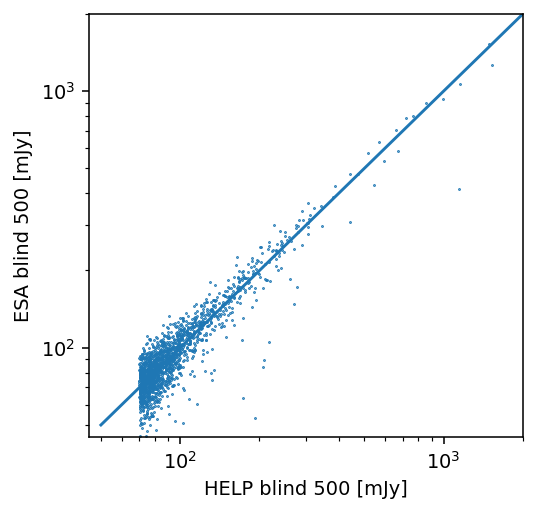

In [28]:
plt.figure(1, figsize=(4, 4), dpi=140)
plt.scatter(master_catalogue['blind_F_SPIRE_500'][both], master_catalogue['esa_fluxsus'][both], s=0.2)
plt.plot([50,2000],[50,2000])
plt.xscale('log')
plt.yscale('log')
plt.xlim([45,2000])
plt.ylim([45,2000])
plt.xlabel('HELP blind 500 [mJy]')
plt.ylabel('ESA blind 500 [mJy]')

In [29]:
[np.sum((master_catalogue['blind_F_SPIRE_500'] > 0) &  ~(master_catalogue['esa_fluxsus'] > 0)), #HELP only
    np.sum(~(master_catalogue['blind_F_SPIRE_500'] > 0) &  (master_catalogue['esa_fluxsus'] > 0)),     #ESA only
    np.sum(np.sum((master_catalogue['blind_F_SPIRE_500'] > 0) &  (master_catalogue['esa_fluxsus'] > 0)))]

[438, 0, 5000]

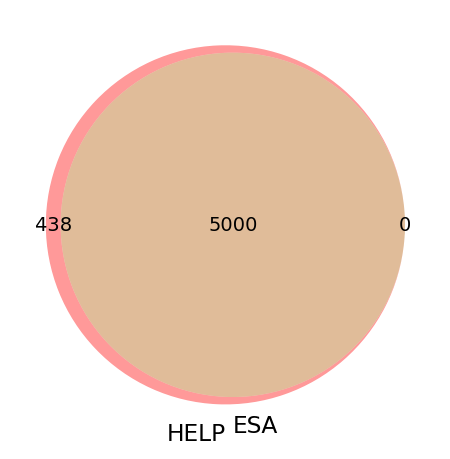

In [30]:
plt.figure(1, figsize=(4, 4), dpi=140)
venn2(subsets = (
    np.sum((master_catalogue['blind_F_SPIRE_500'] > 0) &  ~(master_catalogue['esa_fluxsus'] > 0)), #HELP only
    np.sum(~(master_catalogue['blind_F_SPIRE_500'] > 0) &  (master_catalogue['esa_fluxsus'] > 0)),     #ESA only
    np.sum(np.sum((master_catalogue['blind_F_SPIRE_500'] > 0) &  (master_catalogue['esa_fluxsus'] > 0)))
), set_labels = ('HELP', 'ESA'))

In [ ]:
(master_catalogue['esa_fluxsus'] > 0)

In [ ]:
plt.figure(1, figsize=(4, 4), dpi=140)
venn2(subsets = (
    np.sum((master_catalogue['help_f_spire_500'] > 0) &  ~(master_catalogue['esa_fluxsus'] > 0)), #HELP only
    np.sum(~(master_catalogue['help_F_SPIRE_500'] > 0) &  (master_catalogue['esa_fluxsus'] > 0)),     #ESA only
    np.sum(np.sum((master_catalogue['help_F_SPIRE_500'] > 0) &  (master_catalogue['esa_fluxsus'] > 0)))
), set_labels = ('HELP', 'ESA'))